### Global optimization via simulation-based inference

In [2]:
import math
import numpy as np

import torch

import seaborn as sns
import matplotlib.pyplot as plt

from sbi import utils as utils
from sbi import analysis as analysis
from sbi.examples.minimal import simple
from sbi.inference.base import infer

In [3]:
# let's find the global minimum of the Ackley function

def ackley_function(params):
    # returns the point value of the given coordinate
    part_1 = -0.2 * math.sqrt(0.5 * (params[0] * params[0] + params[1] * params[1]))
    part_2 = 0.5 * (math.cos(2 * math.pi * params[0]) + math.cos(2 * math.pi * params[1]))
    value = math.exp(1) + 20 - 20 * math.exp(part_1) - math.exp(part_2)
    # returning the value
    return np.array([value])

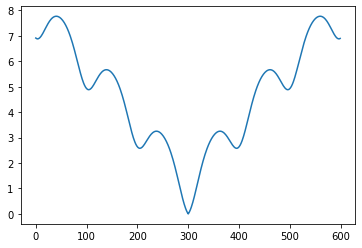

In [4]:
plt.plot([ackley_function([x, 0]) for x in np.arange(-3, 3, 0.01)])

In [5]:
posterior = simple()
print(posterior)

Running 500 simulations.:   0%|          | 0/500 [00:00<?, ?it/s]

Neural network successfully converged after 59 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

Posterior conditional density p(θ|x) (amortized).

This DirectPosterior-object was obtained with a SNPE-class method using a flow.
It allows to .sample() and .log_prob() the posterior and wraps the output of the .net to avoid leakage into regions with 0 prior probability.


In [6]:
prior_min = [-5, -5]
prior_max = [5, 5]
prior = utils.torchutils.BoxUniform(low=torch.as_tensor(prior_min), 
                                    high=torch.as_tensor(prior_max))

In [7]:
posterior = infer(ackley_function, prior, 
                  method='SNPE', 
                  num_simulations=5000, 
                  num_workers=24)

Running 5000 simulations in 5000 batches.:   0%|          | 0/5000 [00:00<?, ?it/s]

Neural network successfully converged after 90 epochs.


In [8]:
posterior_sample  = posterior.sample((3000,), 
                                     x=np.array([0.]))

Drawing 3000 posterior samples:   0%|          | 0/3000 [00:00<?, ?it/s]

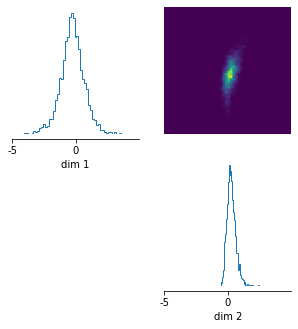

In [9]:
fig, axes = analysis.pairplot(posterior_sample,
                              limits=[[-5, 5], [-5, 5]],
                              ticks=[[-5, 0, 5], [-5, 0, 5]],
                              figsize=(5, 5));

In [10]:
posterior_sample  = posterior.sample((3000,), 
                                     x=np.array([5.]))

Drawing 3000 posterior samples:   0%|          | 0/3000 [00:00<?, ?it/s]

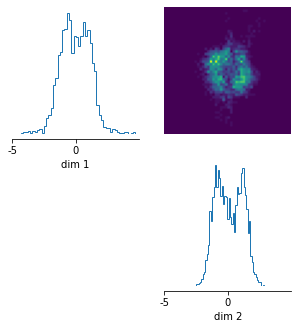

In [11]:
fig, axes = analysis.pairplot(posterior_sample,
                              limits=[[-5, 5], [-5, 5]],
                              ticks=[[-5, 0, 5], [-5, 0, 5]],
                              figsize=(5, 5));